In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.tree import DecisionTreeClassifier

import numpy as np

sns.set(style="whitegrid")

# 0. Etapas da Sessão 01
Aqui nós colocamos todas as etapas da Sessão anterior uma única célula, para ver a explicação de cada etapa você pode olhar o notebook da Sessão 01 em https://github.com/widsrecife/live-coding


In [0]:
# Ler dados de um CSV e coloca em um dataframe

df = pd.read_csv("https://raw.githubusercontent.com/widsrecife/dados/master/Sessao_1/Attribute%20DataSet.csv")

# O pandas tem várias formas de selecionar linhas e colundas ([], .loc, .iloc)
#   aqui vamos usar o [] (indexing operator) onde a gente passa uma lista com as colunas que queremos selecionar

df_colunas_utilizadas = df[["Style","NeckLine","SleeveLength","Material","FabricType","Decoration"]]

# No pandas a gente pode selecionar uma coluna, aplicar uma função e salvar o resultado em uma nuva coluna;
#   para aplicar a função usamos a função apply()

def string_para_minusculo(valor):
    return str(valor).lower()

df["season_minusculo"] = df["Season"].apply(string_para_minusculo)

# Também podemos substituir determinados valores usando a função replace()

df["season_minusculo"] = df["season_minusculo"].replace({"autumn":"automn"})

rotulos_string = df["season_minusculo"]

# Nossa coluna de rótulos (labels em Inglês) tem Strings, mas precisamos que sejam números para usar os algoritmos
#   do scikit-learn
# Vamos converter as strings para números usando a classe LabelEncoder() do scikit-learn
#   Essa função transformar cada string em uma classe de 0 n_classes-1
#   Exemplo: ["vermelho","azul","azul"] se torna [0,1,1]

rotulos_encoder = preprocessing.LabelEncoder()

# Instanciamos a classe LabelEncoder() acima, mas para transformar os dados precisamos que a classe:
#   1. aprenda qual vai ser o número de cada string: método fit()
#   2. transforme os dados em números: método transform
rotulos_encoder.fit(rotulos_string)

rotulos = rotulos_encoder.transform(rotulos_string)

# O scikit-learn possui uma função chamada train_test_split() que divide um conjunto de dados em conjunto de treinamento
#   e conjunto de testes. Isso é importante porque sem o conjunto de testes a gente não vão poder avaliar se um modelo
#   apresenta bons resultados ou não
# Vamos usar o paramêtro stratify para que os dois conjuntos tenham a mesma proporção de classes

dados_treinamento, dados_teste, rotulos_treinamento, rotulos_teste = train_test_split(df_colunas_utilizadas,
                                                                                      rotulos,
                                                                                      stratify=rotulos,
                                                                                      test_size=0.33,
                                                                                      random_state=42)

# Novamente os dados estão no tipo string e precisamos que eles sejam números
#   a classe LabelEncoder() só deve ser usada em uma coluna única [classe]
#   para converter strings de várias colunas utilizamos a classe OrdinalEncoder() do scikit-learn
#   A ideia é a mesma: aprender qual o número de cada string [fit()] e depois transformar [transform()]

# ERRO: na verdade o OrdinalEncoder não é a codificação apropriada aqui, vamos ver mais sobre isso hoje
ordinal_encoder = OrdinalEncoder()

# Para usar o OrdinalEncoder() os dados não podem ter valores faltantes (missing values em Inglês)
#   então preenchemos os valores faltantes com a string "-1"

dados_treinamento_sem_valores_faltantes = dados_treinamento.fillna("-1")

ordinal_encoder.fit(dados_treinamento_sem_valores_faltantes)

dados_treinamento_transformados = ordinal_encoder.transform(dados_treinamento_sem_valores_faltantes)

## 1. Escolhendo variáveis para treinar o modelo
### 1.1 Uniformizando os valores da cada variável
Vamos investigar para ver se existem maiúsculas/minúsculas ou erros de digitação (isso não era uma etapa que eu havia previsto, vi que era necessário quando estava fazendo a análise).

Podemos ver que a coluna SleeveLength talvez tenha variáveis com erros de digitação, mas não vamos corrigir isso agora (fica o exercício, você pode usar o método replace do pandas como fizemos da sessão 01)

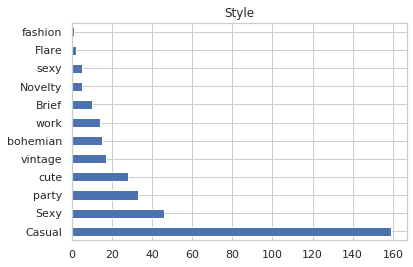

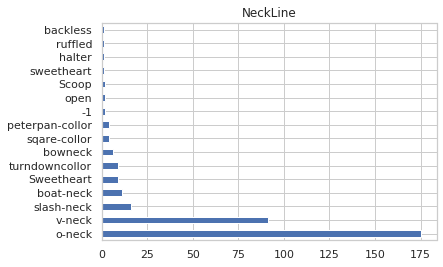

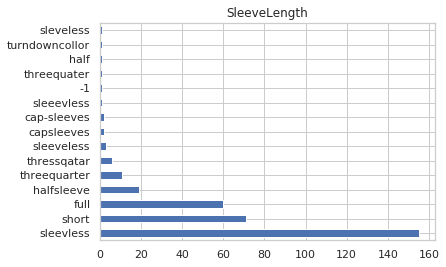

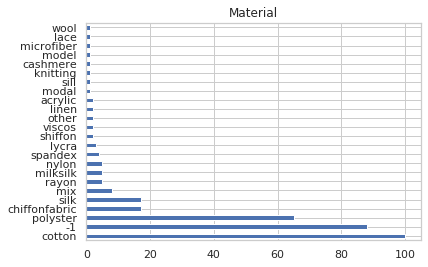

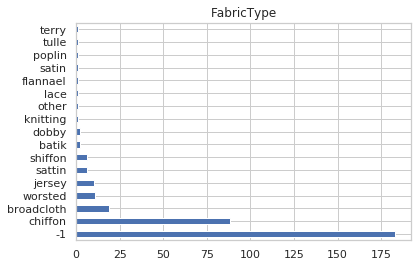

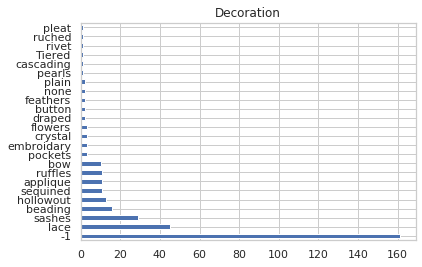

In [0]:
for coluna in dados_treinamento_sem_valores_faltantes.columns:
    dados_treinamento_sem_valores_faltantes[coluna].value_counts().plot.barh()
    plt.title(coluna)
    plt.show()

In [0]:
@np.vectorize
def vec_string_para_minusculo(valor):
    return str(valor).lower()

In [0]:
dados_treinamento_sem_valores_faltantes

,Style,NeckLine,SleeveLength,Material,FabricType,Decoration
342,Casual,o-neck,sleevless,cotton,chiffon,hollowout
12,sexy,o-neck,threequarter,-1,chiffon,lace
51,Casual,o-neck,sleevless,milksilk,-1,-1
130,Casual,v-neck,full,acrylic,-1,lace
217,Casual,o-neck,full,cotton,worsted,lace
...,...,...,...,...,...,...
268,party,Sweetheart,sleevless,polyster,chiffon,beading
207,Casual,o-neck,threequarter,nylon,broadcloth,-1
257,party,v-neck,threequater,lycra,sattin,applique
392,cute,v-neck,sleevless,chiffonfabric,chiffon,-1


In [0]:
# Primeiro vamos colocar tudo em minusculas
#   (ir para o slide 11 da Sessão 02)

dados_treinamento_minusculo = dados_treinamento_sem_valores_faltantes.apply(vec_string_para_minusculo,axis="index")

In [0]:
dados_treinamento_minusculo

,Style,NeckLine,SleeveLength,Material,FabricType,Decoration
342,casual,o-neck,sleevless,cotton,chiffon,hollowout
12,sexy,o-neck,threequarter,-1,chiffon,lace
51,casual,o-neck,sleevless,milksilk,-1,-1
130,casual,v-neck,full,acrylic,-1,lace
217,casual,o-neck,full,cotton,worsted,lace
...,...,...,...,...,...,...
268,party,sweetheart,sleevless,polyster,chiffon,beading
207,casual,o-neck,threequarter,nylon,broadcloth,-1
257,party,v-neck,threequater,lycra,sattin,applique
392,cute,v-neck,sleevless,chiffonfabric,chiffon,-1


In [0]:
dados_treinamento_minusculo.shape

(335, 6)

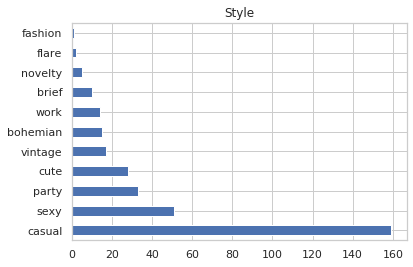

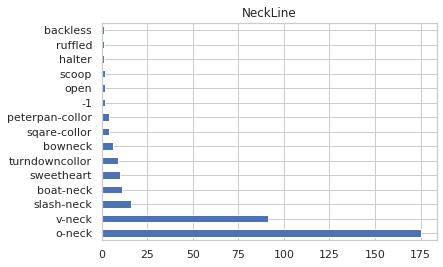

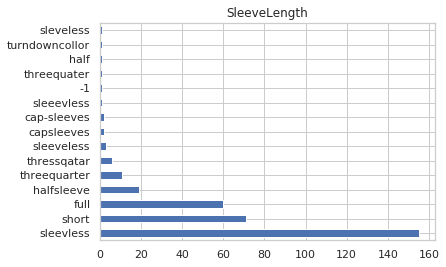

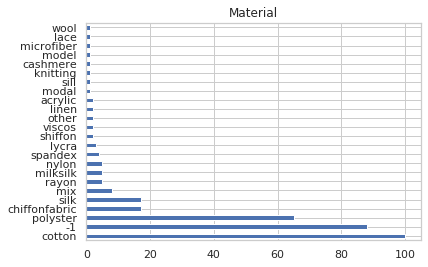

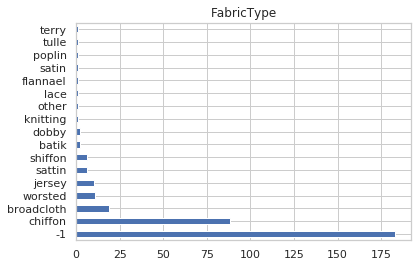

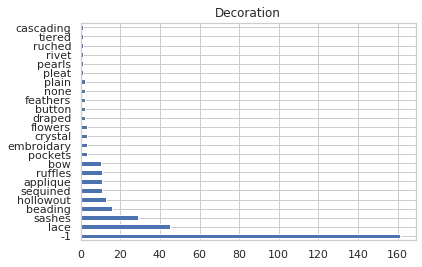

In [0]:
for coluna in dados_treinamento_minusculo.columns:
    dados_treinamento_minusculo[coluna].value_counts().plot.barh()
    plt.title(coluna)
    plt.show()

## 2. Treinando o modelo com a codificação ERRADA

### 2.1 Selecionando as features com o SelectKBest
A classe SelectKBest do scikit-learn seleciona as k features com maiores scores. Para isso precisamos dizer que função será utilizada para calcular os scores. Vamos utilizar a função chi2:

* chi2
O teste qui-quadrado é utilizado para encontrar a probabilidade da distribuição entre duas variáveis ser a mesma para as populações. No nosso caso isso serve para identificar se uma variável está relacionada às classes que queremos classificar com nosso modelo

In [0]:
# A gente pode escolher as features com mais poder preditivo
#   Vamos usar a classe SelectKBest do scikit-learn para fazer isso e a função chi2 para calcular os scores

seletor_de_features = SelectKBest(chi2, k=4)
dados_treinamento_features_selecionadas = seletor_de_features.fit_transform(dados_treinamento_transformados, rotulos_treinamento)

In [0]:
# Precisamos do nome das colunas, então utilizamos os dados da variável dados_treinamento,
#   porque quando transformamos os dados para número temos um ndarray do numpy e não temos mais os nomes das colunas 

print("tipo dados_treinamento:",type(dados_treinamento_sem_valores_faltantes))
print("tipo dados_treinamento_transformados:",type(dados_treinamento_transformados))

tipo dados_treinamento: <class 'pandas.core.frame.DataFrame'>
tipo dados_treinamento_transformados: <class 'numpy.ndarray'>


In [0]:
seletor_de_features.get_support()

array([ True, False, False,  True,  True,  True])

In [0]:
FEATURE_NAMES

Index(['Style', 'NeckLine', 'SleeveLength', 'Material', 'FabricType',
       'Decoration'],
      dtype='object')

In [0]:
FEATURE_NAMES = dados_treinamento_sem_valores_faltantes.columns
features_selecionadas = FEATURE_NAMES[seletor_de_features.get_support()]

In [0]:
# O atributo scores_ do SelectKBest guarda os scores de todas as variáveis

lista_scores = list(zip(seletor_de_features.scores_,FEATURE_NAMES))
df = pd.DataFrame(lista_scores, columns=["score","variável"])

df.sort_values(by="score",ascending=False).head(30)

,score,variável
3,75.430746,Material
4,61.210806,FabricType
5,33.048504,Decoration
0,9.229609,Style
1,5.660473,NeckLine
2,2.586152,SleeveLength


### 2.2 Escolhendo o algoritmo de aprendizagem de máquina
(ir para o slide 14 da Sessão 02)

In [0]:
clf = DecisionTreeClassifier(max_depth=2, random_state=47)
clf = clf.fit(dados_treinamento_features_selecionadas, rotulos_treinamento)

In [0]:
rotulos_encoder.classes_

array(['automn', 'nan', 'spring', 'summer', 'winter'], dtype=object)

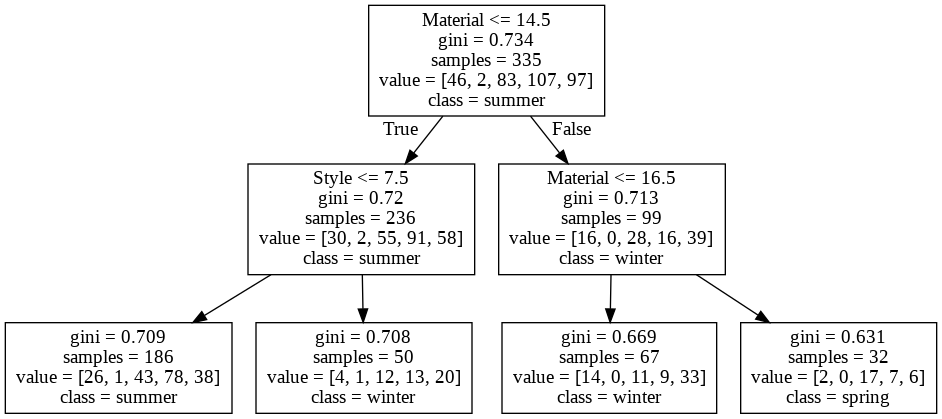

In [0]:
from sklearn import tree
from IPython.display import Image  
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features_selecionadas,
                                class_names=rotulos_encoder.classes_
                                )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [0]:
index_material = features_selecionadas.get_loc("Material")
index_material
pd.DataFrame({"label":dados_treinamento_sem_valores_faltantes["Material"],"codigo":dados_treinamento_features_selecionadas[:, index_material]})

,label,codigo
342,cotton,4.0
12,-1,0.0
51,milksilk,10.0
130,acrylic,1.0
217,cotton,4.0
...,...,...
268,polyster,16.0
207,nylon,14.0
257,lycra,8.0
392,chiffonfabric,3.0


(ir para o slide 17 da Sessão 02)

## 3. Treinando o modelo com a codifição CORRETA

In [0]:
# Precisamos passar os dados para números novamente
#   mas agora de forma correta

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoder.fit(dados_treinamento_minusculo)

dados_treinamento_transformados_one_hot = one_hot_encoder.transform(dados_treinamento_minusculo)

In [0]:
dados_treinamento_transformados_one_hot

<335x106 sparse matrix of type '<class 'numpy.float64'>'
	with 2010 stored elements in Compressed Sparse Row format>

In [0]:
dados_treinamento_transformados_one_hot.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [0]:
dados_treinamento_transformados_one_hot.shape

(335, 106)

In [0]:
one_hot_encoder.categories_

[array(['bohemian', 'brief', 'casual', 'cute', 'fashion', 'flare',
        'novelty', 'party', 'sexy', 'vintage', 'work'], dtype=object),
 array(['-1', 'backless', 'boat-neck', 'bowneck', 'halter', 'o-neck',
        'open', 'peterpan-collor', 'ruffled', 'scoop', 'slash-neck',
        'sqare-collor', 'sweetheart', 'turndowncollor', 'v-neck'],
       dtype=object),
 array(['-1', 'cap-sleeves', 'capsleeves', 'full', 'half', 'halfsleeve',
        'short', 'sleeevless', 'sleeveless', 'sleevless', 'sleveless',
        'threequarter', 'threequater', 'thressqatar', 'turndowncollor'],
       dtype=object),
 array(['-1', 'acrylic', 'cashmere', 'chiffonfabric', 'cotton', 'knitting',
        'lace', 'linen', 'lycra', 'microfiber', 'milksilk', 'mix', 'modal',
        'model', 'nylon', 'other', 'polyster', 'rayon', 'shiffon', 'silk',
        'sill', 'spandex', 'viscos', 'wool'], dtype=object),
 array(['-1', 'batik', 'broadcloth', 'chiffon', 'dobby', 'flannael',
        'jersey', 'knitting', 'lace', 

In [0]:
FEATURE_NAMES = one_hot_encoder.get_feature_names()
FEATURE_NAMES

array(['x0_bohemian', 'x0_brief', 'x0_casual', 'x0_cute', 'x0_fashion',
       'x0_flare', 'x0_novelty', 'x0_party', 'x0_sexy', 'x0_vintage',
       'x0_work', 'x1_-1', 'x1_backless', 'x1_boat-neck', 'x1_bowneck',
       'x1_halter', 'x1_o-neck', 'x1_open', 'x1_peterpan-collor',
       'x1_ruffled', 'x1_scoop', 'x1_slash-neck', 'x1_sqare-collor',
       'x1_sweetheart', 'x1_turndowncollor', 'x1_v-neck', 'x2_-1',
       'x2_cap-sleeves', 'x2_capsleeves', 'x2_full', 'x2_half',
       'x2_halfsleeve', 'x2_short', 'x2_sleeevless', 'x2_sleeveless',
       'x2_sleevless', 'x2_sleveless', 'x2_threequarter',
       'x2_threequater', 'x2_thressqatar', 'x2_turndowncollor', 'x3_-1',
       'x3_acrylic', 'x3_cashmere', 'x3_chiffonfabric', 'x3_cotton',
       'x3_knitting', 'x3_lace', 'x3_linen', 'x3_lycra', 'x3_microfiber',
       'x3_milksilk', 'x3_mix', 'x3_modal', 'x3_model', 'x3_nylon',
       'x3_other', 'x3_polyster', 'x3_rayon', 'x3_shiffon', 'x3_silk',
       'x3_sill', 'x3_spandex', 'x3_v

### 3.1 SelectKBest
A classe SelectKBest do scikit-learn seleciona as k features com maiores scores. Para isso precisamos dizer que função será utilizada para calcular os scores. Vamos utilizar a função chi2:

* chi2
O teste qui-quadrado é utilizado para encontrar a probabilidade da distribuição entre duas variáveis ser a mesma para as populações. No nosso caso isso serve para identificar se uma variável está relacionada às classes que queremos classificar com nosso modelo




In [0]:
# A gente pode escolher as features com mais poder preditivo
#   Vamos usar a classe SelectKBest do scikit-learn para fazer isso e a função chi2 para calcular os scores

seletor_de_features = SelectKBest(chi2, k=20)
dados_treinamento_features_selecionadas = seletor_de_features.fit_transform(dados_treinamento_transformados_one_hot, rotulos_treinamento)

In [0]:
# Precisamos do nome das colunas, então utilizamos os dados da variável dados_treinamento,
#   porque quando transformamos os dados para número temos um ndarray do numpy e não temos mais os nomes das colunas 

print("tipo dados_treinamento:",type(dados_treinamento_sem_valores_faltantes))
print("tipo dados_treinamento_transformados:",type(dados_treinamento_transformados_one_hot))

tipo dados_treinamento: <class 'pandas.core.frame.DataFrame'>
tipo dados_treinamento_transformados: <class 'scipy.sparse.csr.csr_matrix'>


In [0]:
# O atributo scores_ do SelectKBest guarda os scores de todas as variáveis

lista_scores = list(zip(seletor_de_features.scores_,FEATURE_NAMES))
df = pd.DataFrame(lista_scores, columns=["score","variável"])

df.sort_values(by="score",ascending=False).head(30)

,score,variável
98,166.500000,x5_pleat
57,19.435084,x3_polyster
23,17.160640,x1_sweetheart
7,14.974022,x0_party
45,13.012058,x3_cotton
48,12.565217,x3_linen
58,8.541831,x3_rayon
68,8.119631,x4_chiffon
8,6.491878,x0_sexy
47,6.282609,x3_lace


In [0]:
features_selecionadas = FEATURE_NAMES[seletor_de_features.get_support()]
print("Features selecionadas:",features_selecionadas)

Features selecionadas: ['x0_brief' 'x0_cute' 'x0_flare' 'x0_party' 'x0_sexy' 'x1_scoop'
 'x1_sweetheart' 'x3_cotton' 'x3_lace' 'x3_linen' 'x3_other' 'x3_polyster'
 'x3_rayon' 'x3_shiffon' 'x3_spandex' 'x4_-1' 'x4_chiffon' 'x5_-1'
 'x5_feathers' 'x5_pleat']


In [0]:
dados_treinamento_features_selecionadas.shape

(335, 20)

### 3.2 Escolhendo o algoritmo de aprendizagem de máquina


In [0]:
clf = DecisionTreeClassifier(max_depth=3, random_state=50)
clf = clf.fit(dados_treinamento_features_selecionadas, rotulos_treinamento)

In [0]:
rotulos_encoder.classes_

array(['automn', 'nan', 'spring', 'summer', 'winter'], dtype=object)

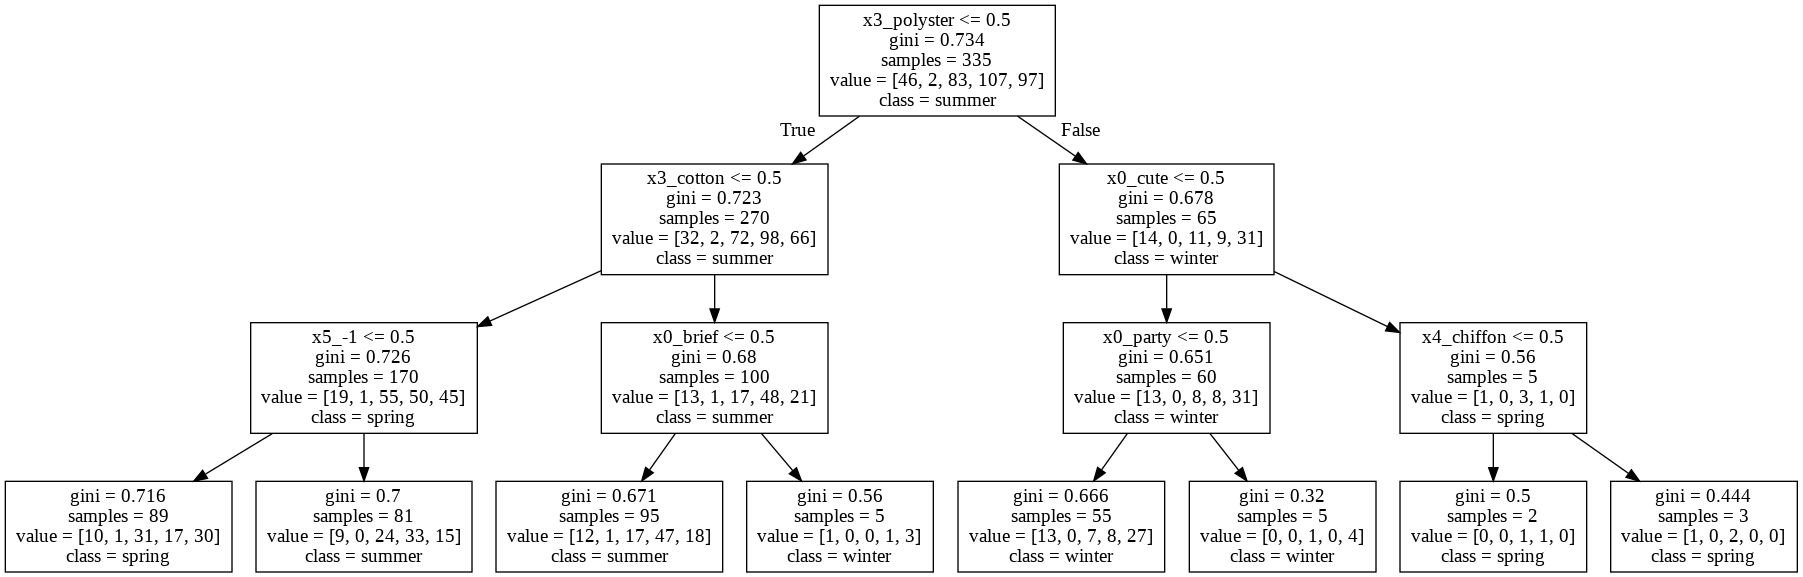

In [0]:
from sklearn import tree
from IPython.display import Image  
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features_selecionadas,
                                class_names=rotulos_encoder.classes_
                                )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## 4. Avaliando o modelo

In [0]:
dados_teste_sem_valores_faltantes = dados_teste.fillna("-1")

dados_teste_transformados = one_hot_encoder.transform(dados_teste_sem_valores_faltantes)

dados_teste_features_selecionadas = seletor_de_features.transform(dados_teste_transformados)

# acurácia média
clf.score(dados_teste_features_selecionadas,rotulos_teste)

0.4484848484848485

(ir para o slide 21 Sessão 02)